In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache
from numba import jit
import community

In [0]:
#@jit('f8[:,:](f8[:,:])', nopython=True)
@jit(nopython = True)
def generator(A):
    #A = nx.to_numpy_matrix(graph)
    #print(A)
    #A = np.array(A_in)
    # https://stackoverflow.com/questions/51106618/how-to-use-np-empty-inside-numba-compiled-function-error-message-all-templates
    B = np.zeros((len(A)+2, len(A)+2), np.int_)
    B[1:-1,1:-1] = A
    #print(B)
    for i in range(len(B)):
        for j in range(len(B)):
            count = 0
            count += B[i][j]
            if i-1 > 0:
                count += B[i-1][j]
            if i+1 < len(B):
                count += B[i+1][j]
            if j-1 > 0:
                count += B[i][j-1]
            if j+1 < len(B):
                count += B[i][j+1]
            #print(count)
            if count == 0:
                B[i][j] = 1
            if count > 4:# or count == 2:
                B[i][j] = 1
            #if count > 6:
            #    B[i][j] = 1
            if count <= 4 and count > 0:
                B[i][j] = 0
    #B[0][0] = 0
    #B[len(B)-1][len(B)-1] = 0
    #print(B)
    Bnext = np.zeros_like(B, np.int_)
    Bnext = np.triu(B,1) + B.T - np.diag(np.diag(B))
    #Bnext[Bnext>1] = 1
    for i in range(len(Bnext)):
      for j in range(len(Bnext)):
        if Bnext[i][j] > 1:
          Bnext[i][j] = 1
    #Bnext = tuple(Bnext.tolist())
#    print(Bnext)
    return(Bnext)
    #graphnext = nx.from_numpy_matrix(Bnext)
    #return(graphnext)

In [0]:
try:
    from functools import lru_cache
except ImportError:
    from backports.functools_lru_cache import lru_cache

In [0]:
#@lru_cache(maxsiuze=None)
def generator2(A_, number):
  time = 0
  while time < number:
    A_ = generator(A_)
    time += 1
  return A_

[[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


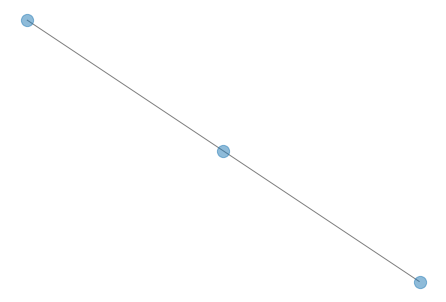

In [3]:
g4 = nx.erdos_renyi_graph(3, 0.8)
A4 = nx.to_numpy_matrix(g4)
print(A4)
#A4 =tuple(A4.tolist())
#print(A4)
#A4 = np.array(A4)
#print(A4)
nx.draw(g4, node_size=150, alpha=0.5)#, with_labels=True, font_weight = 'bold')
#plt.savefig('400.png')#.format('num'))
plt.show()

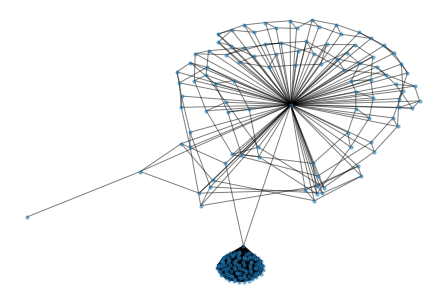

In [7]:
gen_A4 = generator2(A4, 100)
gen_g4 = nx.from_numpy_matrix(gen_A4)
nx.draw(gen_g4, node_size=10, alpha=0.5)#, with_labels=True, font_weight = 'bold')
#plt.savefig('400.png')#.format('num'))
plt.show()

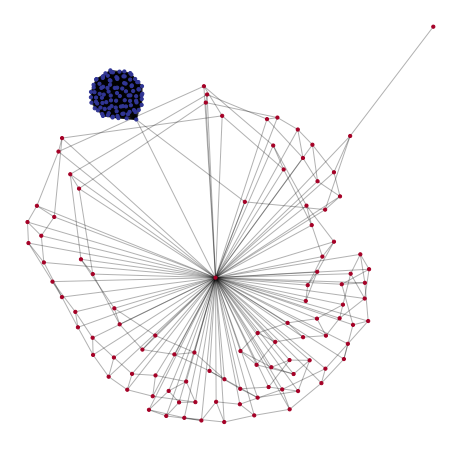

In [8]:
partition = community.best_partition(gen_g4)
pos = nx.spring_layout(gen_g4)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(gen_g4, pos, node_size=10, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(gen_g4, pos, alpha=0.3)
plt.show(gen_g4)

[[0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 0.]]


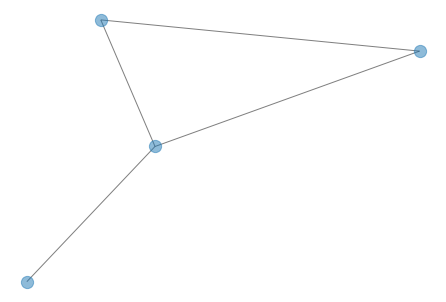

In [9]:
g5 = nx.erdos_renyi_graph(4, 0.8)
A5 = nx.to_numpy_matrix(g5)
print(A5)
#A4 =tuple(A4.tolist())
#print(A4)
#A4 = np.array(A4)
#print(A4)
nx.draw(g5, node_size=150, alpha=0.5)#, with_labels=True, font_weight = 'bold')
#plt.savefig('400.png')#.format('num'))
plt.show()

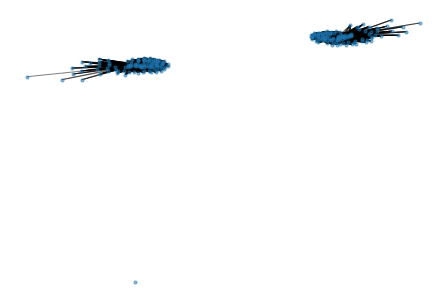

In [10]:
gen_A5 = generator2(A5, 100)
gen_g5 = nx.from_numpy_matrix(gen_A5)
nx.draw(gen_g5, node_size=10, alpha=0.5)#, with_labels=True, font_weight = 'bold')
#plt.savefig('400.png')#.format('num'))
plt.show()

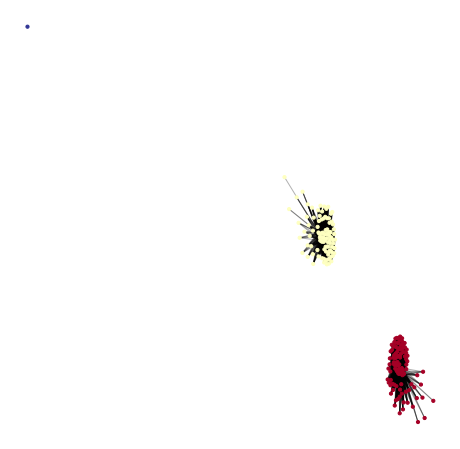

In [11]:
partition = community.best_partition(gen_g5)
pos = nx.spring_layout(gen_g5)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(gen_g5, pos, node_size=10, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(gen_g5, pos, alpha=0.3)
plt.show(gen_g5)

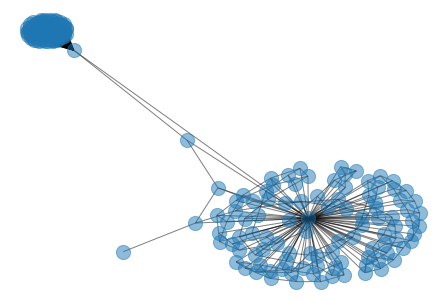

In [0]:
time = 0
num = 100
while time < num:
              g4 = generator(g4)
              time += 1
nx.draw(g4, node_size=200, alpha=0.5)#, with_labels=True, font_weight = 'bold')
#plt.savefig('400.png')#.format('num'))
plt.show()

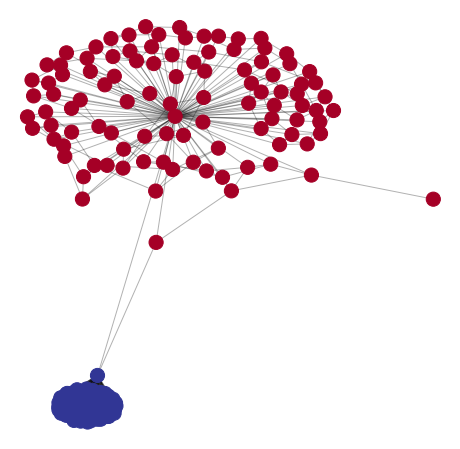

In [0]:

partition = community.best_partition(g4)
pos = nx.spring_layout(g4)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(g4, pos, node_size=200, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(g4, pos, alpha=0.3)
plt.show(g4)